In [41]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [2]:
#Load dataset

file_path = '/Users/joycemungai/ds_projects/insurance_predictive_analytics/datasets/'

data = pd.read_csv(file_path + 'insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
count_nan = data.isnull().sum()
count_nan[count_nan > 0]

bmi    5
dtype: int64

In [4]:
#fill in missing values
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [5]:
count_nan = data.isnull().sum()
count_nan[count_nan > 0]

Series([], dtype: int64)

 ### Explore the data

Lets check the distribution of charges, age, bmi and children

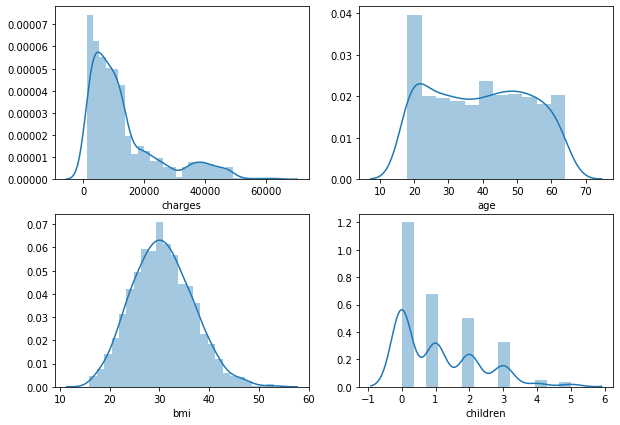

In [6]:
f, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=False)

sns.distplot(data['charges'], ax=axes[0, 0])
sns.distplot(data['age'], ax=axes[0, 1])
sns.distplot(data['bmi'], ax=axes[1, 0])
sns.distplot(data['children'],ax=axes[1, 1])

plt.show()

Now, let's check on the categorical data

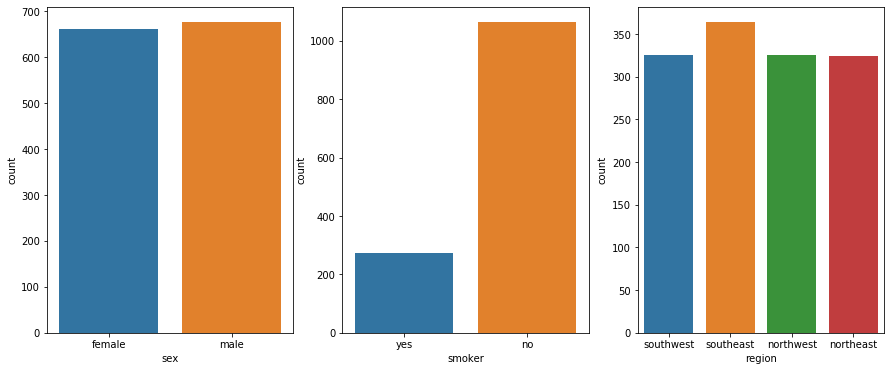

In [7]:
f, axes = plt.subplots(1, 3, figsize=(15, 6), sharex=False,squeeze=False)

sns.countplot(x='sex', ax=axes[0, 0], data=data)
sns.countplot(x='smoker', ax=axes[0, 1], data=data)
sns.countplot(x='region', ax=axes[0, 2], data=data)

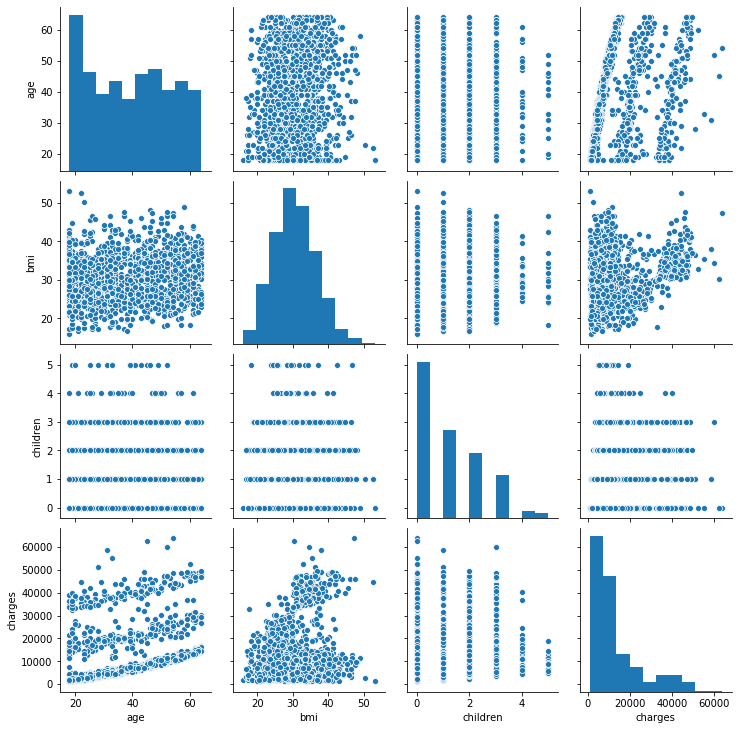

In [8]:
sns.pairplot(data)

There seems to have correlation between charges and age

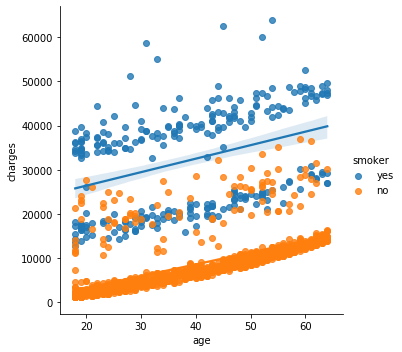

In [9]:
sns.lmplot(x='age', y='charges', hue ='smoker', data=data)

Smokers have high charges than non-smokers

Let's check the correlation matrix

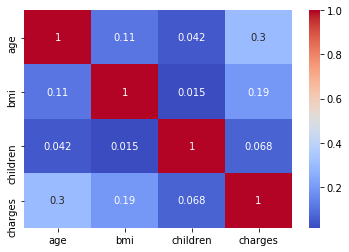

In [10]:
corr = data.corr()

sns.heatmap(corr,annot=True, cmap='coolwarm')

We can see that the biggest correlation is with age with a .3

### Convert categorical data into numbers

Types of encoding: 
    1. Label encoding - converting each value in a column to a number
    2. Onehot encoding- convert each category value into a new column and assigns a 1 or 0

In [11]:
#create ndarray for label encoding (sklearn)
sex = data.iloc[:,1:2].values
smoker  = data.iloc[:, 4:5].values

In [12]:
le = LabelEncoder()
sex[:,0] = le.fit_transform(sex[:,0])
sex = pd.DataFrame(sex)
sex.columns = ['sex']
le_sex_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for sex:")
print(le_sex_mapping)
print(sex[:10])

Sklearn label encoder results for sex:
{'female': 0, 'male': 1}
  sex
0   0
1   1
2   1
3   1
4   1
5   0
6   0
7   0
8   1
9   0


In [13]:
le = LabelEncoder()
smoker[:,0] = le.fit_transform(smoker[:,0])
smoker = pd.DataFrame(smoker)
smoker.columns = ['smoker']
le_smoker_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for smoker:")
print(le_smoker_mapping)
print(smoker[:10])

Sklearn label encoder results for smoker:
{'no': 0, 'yes': 1}
  smoker
0      1
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0


In [14]:
region = data.iloc[:, 5:6].values

In [15]:
ohe = OneHotEncoder()

region = ohe.fit_transform(region).toarray()
region = pd.DataFrame(region)
region.columns = ['northeast', 'northwest', 'southeast', 'southwest']
print("Sklearn onehot encoder results for region:")
print(region[:10])

Sklearn onehot encoder results for smoker:
   northeast  northwest  southeast  southwest
0        0.0        0.0        0.0        1.0
1        0.0        0.0        1.0        0.0
2        0.0        0.0        1.0        0.0
3        0.0        1.0        0.0        0.0
4        0.0        1.0        0.0        0.0
5        0.0        0.0        1.0        0.0
6        0.0        0.0        1.0        0.0
7        0.0        1.0        0.0        0.0
8        1.0        0.0        0.0        0.0
9        0.0        1.0        0.0        0.0


### Split training and testing data

In [29]:
#take the numerical columns from the original dataframe
X_num = data[['age', 'bmi','children']]

#concatenate with the encoded data
X_final = pd.concat([X_num, sex, smoker, region], axis = 1)

y_final = data[['charges']].copy()

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=0)

### Feature Scaling

#### Normalization

In [22]:
#normalization
n_scaler = MinMaxScaler()

X_train = n_scaler.fit_transform(X_train.astype(np.float))
X_test = n_scaler.transform(X_test.astype(np.float))

#### Standardization

In [30]:
s_scaler = StandardScaler()

X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [31]:
print(X_train[:5])

[[-1.03606235  0.61468414 -0.91008919 -0.98669564 -0.4996512  -0.54811989
   1.77430216 -0.61002347 -0.58766091]
 [-1.46484381  0.64957783  0.7540739  -0.98669564  2.00139616 -0.54811989
  -0.56360186 -0.61002347  1.70166159]
 [-0.82167162  0.37367425  1.58615545  1.01348375 -0.4996512  -0.54811989
  -0.56360186  1.63928118 -0.58766091]
 [ 0.89345423  1.24682792  0.7540739  -0.98669564 -0.4996512   1.82441838
  -0.56360186 -0.61002347 -0.58766091]
 [-1.53630739  0.10588549 -0.91008919 -0.98669564 -0.4996512  -0.54811989
  -0.56360186  1.63928118 -0.58766091]]


### Modeling

#### Linear Regression

In [33]:
lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [34]:
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))
print('lr train score %.3f, lr test score: %.3f' % (
lr.score(X_train,y_train),
lr.score(X_test, y_test)))

lr.coef_: [[3624.36356197 1966.90473927  661.35603447  -44.54996175 9310.54961689
   242.57758422  -29.49212715 -104.19142495  -99.14488063]]
lr.intercept_: [13141.35083164]
lr train score 0.728, lr test score: 0.786


#### Polynomial Regression

In [36]:
#fit and split
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_final)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y_final, test_size=0.33, random_state=0)

In [37]:
#standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test = sc.transform(X_test.astype(np.float))

In [39]:
#fit model
poly_lr = LinearRegression().fit(X_train, y_train)

y_train_pred = poly_lr.predict(X_train)
y_test_pred = poly_lr.predict(X_test)

In [40]:
print('poly train score %.3f, poly test score: %.3f' % (
poly_lr.score(X_train,y_train),
poly_lr.score(X_test, y_test)))

poly train score 0.827, poly test score: 0.870


#### Support Vector Regression

In [42]:
svr = SVR(kernel='linear', C = 300)

#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
svr = svr.fit(X_train,y_train.values.ravel())
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

#print score
print('svr train score %.3f, svr test score: %.3f' % (
svr.score(X_train,y_train),
svr.score(X_test, y_test)))

svr train score 0.598, svr test score: 0.628


#### Decision Trees